# Importing the data

In [1]:
    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# importing some essential libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [6]:
my_data_dir = 'Hindi-MNIST'
os.listdir(my_data_dir) 

['test', 'train']

In [7]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [8]:
os.listdir(test_path)

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

In [9]:
os.listdir(train_path)

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']

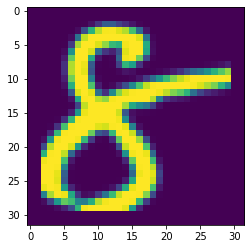

In [10]:
sample_path= train_path+'/4/'+ os.listdir(train_path+'/4')[0]
sample_img=imread(sample_path)
plt.imshow(sample_img)

In [11]:
sample_img.shape

(32, 32)

#### Let's check how many images there are and what their dimensions are

In [12]:
# for train data
for i in range (10):
    print('Total images in '+str(i)+' : '+str(len(os.listdir(train_path+str(i)))))
    print('Dimension of images in '+str(i)+" : " + str(imread(train_path+'/'+str(i)+'/'+ os.listdir(train_path+'/'+str(i)+'/')[0]).shape) )

Total images in 0 : 1700
Dimension of images in 0 : (32, 32)
Total images in 1 : 1700
Dimension of images in 1 : (32, 32)
Total images in 2 : 1700
Dimension of images in 2 : (32, 32)
Total images in 3 : 1700
Dimension of images in 3 : (32, 32)
Total images in 4 : 1700
Dimension of images in 4 : (32, 32)
Total images in 5 : 1700
Dimension of images in 5 : (32, 32)
Total images in 6 : 1700
Dimension of images in 6 : (32, 32)
Total images in 7 : 1700
Dimension of images in 7 : (32, 32)
Total images in 8 : 1700
Dimension of images in 8 : (32, 32)
Total images in 9 : 1700
Dimension of images in 9 : (32, 32)


In [13]:
# for test data
for i in range (10):
    print('Total images in '+str(i)+' : '+str(len(os.listdir(test_path+str(i)))))
    print('Dimension of images in '+str(i)+" : " + str(imread(test_path+'/'+str(i)+'/'+ os.listdir(test_path+'/'+str(i)+'/')[0]).shape) )

Total images in 0 : 300
Dimension of images in 0 : (32, 32)
Total images in 1 : 300
Dimension of images in 1 : (32, 32)
Total images in 2 : 300
Dimension of images in 2 : (32, 32)
Total images in 3 : 300
Dimension of images in 3 : (32, 32)
Total images in 4 : 300
Dimension of images in 4 : (32, 32)
Total images in 5 : 300
Dimension of images in 5 : (32, 32)
Total images in 6 : 300
Dimension of images in 6 : (32, 32)
Total images in 7 : 300
Dimension of images in 7 : (32, 32)
Total images in 8 : 300
Dimension of images in 8 : (32, 32)
Total images in 9 : 300
Dimension of images in 9 : (32, 32)


# Preparing the Data

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

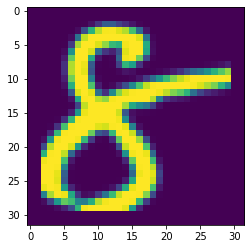

In [16]:
plt.imshow(sample_img)

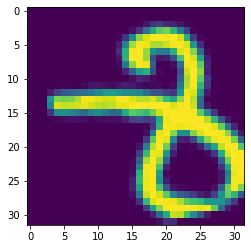

In [17]:
plt.imshow(image_gen.random_transform(np.expand_dims(sample_img,axis=2)))

In [18]:
image_gen.flow_from_directory(train_path)

Found 17000 images belonging to 10 classes.


In [19]:
image_gen.flow_from_directory(test_path)

Found 3000 images belonging to 10 classes.


# Creating the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [21]:
image_shape=(32,32,1)
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its multi-class classification so we use sigmoid
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-08-16 12:51:26.796753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Early Stopping

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, monitor='val_loss')

# Training the Model

In [24]:
batch_size = 16
image_shape=(32,32,1)
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 17000 images belonging to 10 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 3000 images belonging to 10 classes.


In [26]:
train_image_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [27]:
import warnings
warnings.filterwarnings('ignore')
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1063/1063 [==============================] - 38s 35ms/step - loss: 1.0192 - accuracy: 0.6476 - val_loss: 0.4060 - val_accuracy: 0.8717
Epoch 2/20
1063/1063 [==============================] - 28s 27ms/step - loss: 0.4665 - accuracy: 0.8452 - val_loss: 0.2800 - val_accuracy: 0.9040
Epoch 3/20
1063/1063 [==============================] - 32s 30ms/step - loss: 0.3513 - accuracy: 0.8846 - val_loss: 0.2502 - val_accuracy: 0.9070
Epoch 4/20
1063/1063 [==============================] - 35s 32ms/step - loss: 0.2927 - accuracy: 0.9021 - val_loss: 0.2052 - val_accuracy: 0.9377
Epoch 5/20
1063/1063 [==============================] - 35s 33ms/step - loss: 0.2511 - accuracy: 0.9168 - val_loss: 0.1587 - val_accuracy: 0.9513
Epoch 6/20
1063/1063 [==============================] - 35s 33ms/step - loss: 0.2312 - accuracy: 0.9246 - val_loss: 0.1300 - val_accuracy: 0.9590
Epoch 7/20
1063/1063 [==============================] - 55s 52ms/step - loss: 0.2081 - accuracy: 0.9314 - val_loss: 0.1511 -

# Evaluate the Model

In [25]:
model.metrics_names
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.986384,0.660000,0.388864,0.864000
1,0.455899,0.844882,0.272579,0.907667
2,0.338803,0.887706,0.209032,0.934333
3,0.290055,0.908412,0.185424,0.942000
4,0.239679,0.920294,0.151393,0.948667


<AxesSubplot:>

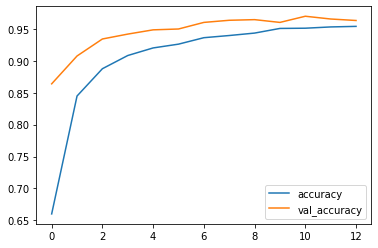

In [26]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

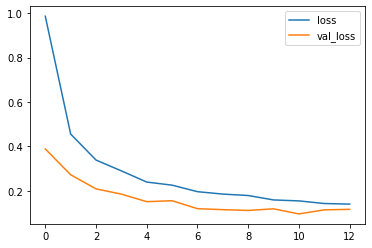

In [27]:
losses[['loss','val_loss']].plot()

In [28]:
from tensorflow.keras.preprocessing import image
y_pred = np.argmax(model.predict(test_image_gen), axis=-1)
# y_pred = np.round(y_pred).astype(int)
# pred_probabilities = model.predict_classes(test_image_gen)
print(y_pred)

[0 0 0 ... 9 9 9]


In [29]:
len(y_pred)

3000

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       300
           1       0.98      0.98      0.98       300
           2       0.96      0.96      0.96       300
           3       0.99      0.83      0.91       300
           4       0.99      0.99      0.99       300
           5       0.98      0.97      0.98       300
           6       0.86      0.97      0.91       300
           7       0.97      0.96      0.97       300
           8       0.99      0.99      0.99       300
           9       0.96      0.98      0.97       300

    accuracy                           0.96      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.96      0.96      3000



<AxesSubplot:>

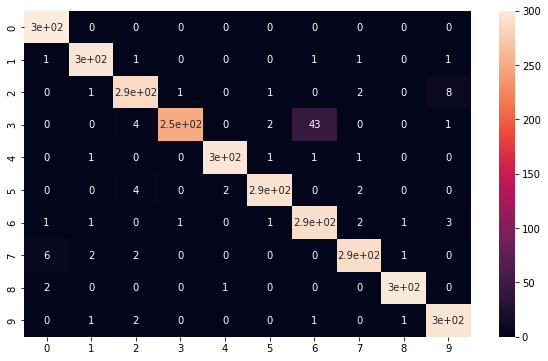

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_image_gen.classes,y_pred),annot=True)

# Predicting an image

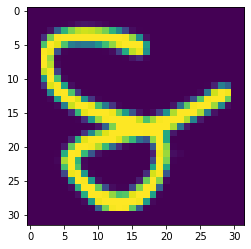

In [32]:
plt.imshow(sample_img)

In [33]:
pred=model.predict(sample_img.reshape(1,32,32,1))
pred= np.argmax(pred)
print(pred)

4


In [29]:
import pickle 

In [30]:
pickle.dump(model,open('model.pickle','wb'))

INFO:tensorflow:Assets written to: ram://81052ebe-4567-4e60-8fe8-e1c482b9d57d/assets


INFO:tensorflow:Assets written to: ram://81052ebe-4567-4e60-8fe8-e1c482b9d57d/assets
